In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
from sklearn.preprocessing import normalize

df = pd.read_csv("/content/drive/MyDrive/db.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','Pedigree']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1);

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

from sklearn.metrics import classification_report
target_names = ['without diabetes','with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.78      0.90      0.84        99
   with diabetes       0.75      0.55      0.63        55

        accuracy                           0.77       154
       macro avg       0.77      0.72      0.73       154
    weighted avg       0.77      0.77      0.76       154



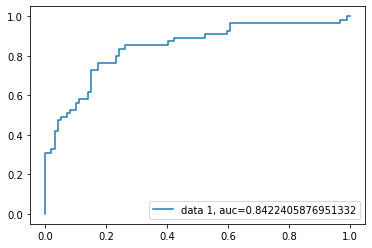

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
result=min_max_scaler.fit_transform(df)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y= df.Outcome
x=df.drop('Outcome',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import math

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train,y_train)
training_score=clf.score(x_train, y_train)
test_score=clf.score(x_test, y_test)

In [ ]:
test_score

0.6753246753246753

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 7):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    print("k value= ",k," test score= ",test_score,"")

k value=  2  test score=  0.6753246753246753 
k value=  3  test score=  0.6428571428571429 
k value=  4  test score=  0.6948051948051948 
k value=  5  test score=  0.6948051948051948 
k value=  6  test score=  0.7597402597402597 


In [ ]:
y_pred = clf.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_pred)
cm

array([[90,  8],
       [29, 27]])

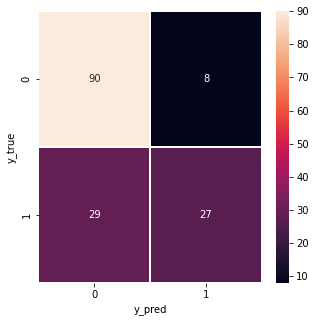

In [ ]:
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="white", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
a=accuracy_score(y_test, y_pred)

a

0.7727272727272727

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

[[89 10]
 [25 30]]


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        98
           1       0.38      0.27      0.31        56

    accuracy                           0.57       154
   macro avg       0.51      0.51      0.50       154
weighted avg       0.54      0.57      0.55       154



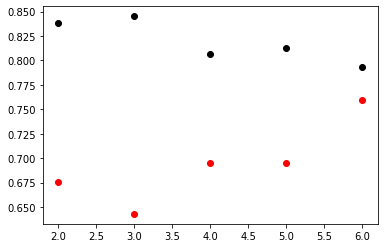

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='r')
plt.show()